In [70]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, recall_score
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score
from numpy import where
from collections import Counter
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks

   length_51  length_52  length_53  length_54  length_55  length_56  \
0   0.000152   0.000081   0.000087   0.000092   0.000099   0.000125   
1   0.006256   0.006413   0.006512   0.006469   0.006810   0.007070   
2   0.003783   0.003886   0.004063   0.004237   0.004481   0.004832   
3   0.004635   0.004471   0.004383   0.004829   0.004920   0.005056   
4   0.011315   0.010045   0.009795   0.009906   0.010630   0.011467   

   length_57  length_58  length_59  length_60  ...  length_392  length_393  \
0   0.000122   0.000115   0.000151   0.000167  ...    0.007396    0.007193   
1   0.007748   0.008088   0.008671   0.008835  ...    0.017830    0.017033   
2   0.004960   0.005605   0.005919   0.006480  ...    0.010957    0.010481   
3   0.005475   0.006158   0.007174   0.007697  ...    0.010032    0.008933   
4   0.013024   0.014853   0.016874   0.017501  ...    0.009118    0.008535   

   length_394  length_395  length_396  length_397  length_398  length_399  \
0    0.006973    0.006481  

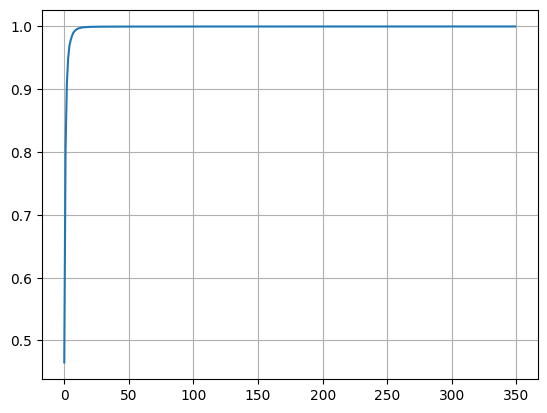

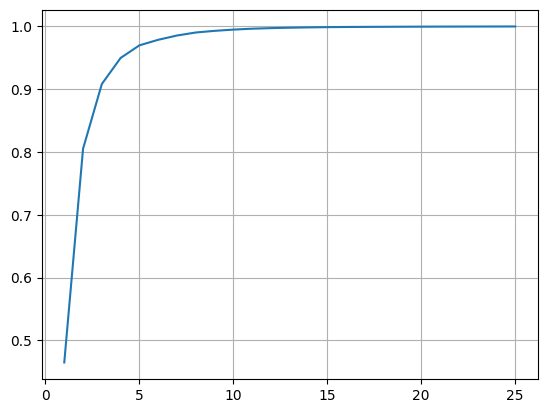

350
['length_55', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_80', 'length_81', 'length_82', 'length_83', 'length_84', 'length_85', 'length_86', 'length_87', 'length_88', 'length_89', 'length_90', 'length_91', 'length_92', 'length_93', 'length_94', 'length_95', 'length_96', 'length_97', 'length_98', 'length_99', 'length_100', 'length_101', 'length_102', 'length_103', 'length_104', 'length_105', 'length_106', 'length_107', 'length_108', 'length_109', 'length_110', 'length_111', 'length_112', 'length_113', 'length_114', 'length_115', 'length_116', 'length_117', 'length_118', 'length_119', 'length_120', 'length_121', 'length_122', 'length_123', 'length_124', 'length_125', 'length_126', 'length_127', 'length_128', 'len

In [25]:

%run HealthyvsCancer.ipynb


In [51]:

train_x = xvals_train_filtered
train_y = yvals_binary


test_y = yvals_test.map({'cancer': 1, 'healthy': 0})
test_x = xvals_test_filtered

class_counts = train_y.value_counts()


In [52]:
# Define pipeline for SMOTE 
smote_pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy=0.5)),  # Adjust as needed
    ('classifier', KNeighborsClassifier())
])

# Define parameter grids for SMOTE 
smote_param_grid = {
    'sampling__k_neighbors': [3, 5, 7],
    'classifier__n_neighbors': range(2, 30)
}

# Perform grid search for SMOTE 
smote_grid_search = GridSearchCV(smote_pipeline, smote_param_grid, cv=5, scoring='recall')
smote_grid_search.fit(train_x, train_y)

best_params_smote = smote_grid_search.best_params_
print(best_params_smote)

{'classifier__n_neighbors': 3, 'sampling__k_neighbors': 5}


In [53]:
smote = SMOTE(k_neighbors=best_params_smote['sampling__k_neighbors'], sampling_strategy=0.5)
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)
class_counts = train_y_smote.value_counts()
print(class_counts)
print(type(train_y_smote))

class_label
1    2133
0    1066
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [54]:
# Initialize Near-Miss with a range of n_neighbors values
near_miss = NearMiss(sampling_strategy='auto', version=1)
param_grid = {'sampling__n_neighbors': [1, 3, 5, 7]}

# Create a pipeline with Near-Miss and KNN classifier
pipeline = Pipeline([
    ('sampling', near_miss),
    ('classifier', KNeighborsClassifier())
])

scoring = ['f1', ]
# Perform grid search
nm_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
nm_grid_search.fit(train_x_smote, train_y_smote)

best_params_near_miss = nm_grid_search.best_params_
print(best_params_near_miss)

{'sampling__n_neighbors': 7}


In [56]:
# Initialize ENN
enn = EditedNearestNeighbours()

# Define parameter grid
param_grid_enn = {'sampling__n_neighbors': [1, 3, 5, 7], 
                  'classifier__n_neighbors': [1, 3, 5, 7]}

# Create a pipeline with ENN and KNN classifier
pipeline_enn = Pipeline([
    ('sampling', enn),
    ('classifier', KNeighborsClassifier())
])

# Perform grid search
grid_search_enn = GridSearchCV(pipeline_enn, param_grid_enn, cv=5, scoring='recall')
grid_search_enn.fit(train_x_smote, train_y_smote)

# Get the best parameters
best_params_enn = grid_search_enn.best_params_
print(best_params_enn)

{'classifier__n_neighbors': 3, 'sampling__n_neighbors': 1}


In [57]:
near_miss = NearMiss(sampling_strategy='auto', version=1, n_neighbors= best_params_near_miss['sampling__n_neighbors'])
tomek_links = TomekLinks(sampling_strategy='auto')
enn = EditedNearestNeighbours(n_neighbors= best_params_enn['sampling__n_neighbors'], )

custom_undersampler_pipeline = Pipeline([
    ('near_miss', near_miss),
    ('tomek_links', tomek_links),
    ('enn', enn)
])

In [58]:
train_x, train_y = custom_undersampler_pipeline.fit_resample(train_x_smote, train_y_smote)

counts = train_y.value_counts()

print(counts)

class_label
1    1044
0     989
Name: count, dtype: int64


In [74]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_params_smote['classifier__n_neighbors'])
knn_classifier.fit(train_x, train_y)
y_pred = knn_classifier.predict(test_x)
print(classification_report(test_y, y_pred, target_names= ["Healthy", "Cancer"]))

              precision    recall  f1-score   support

     Healthy       0.08      0.54      0.15        41
      Cancer       0.98      0.76      0.85       993

    accuracy                           0.75      1034
   macro avg       0.53      0.65      0.50      1034
weighted avg       0.94      0.75      0.83      1034



In [80]:
#hyper parameter tuning
train_recall_scores = {}
test_recall_scores = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(train_x, train_y)
    
    train_recall = recall_score(train_y, knn.predict(train_x))
    test_recall = recall_score(test_y, knn.predict(test_x))

    train_recall_scores[neighbor] = train_recall
    test_recall_scores[neighbor] = test_recall

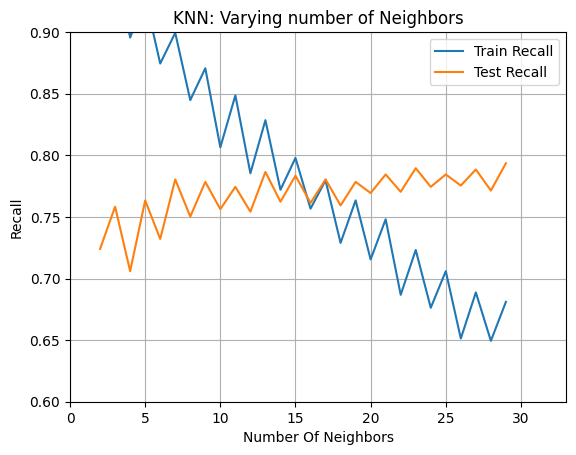

In [77]:
plt.plot(n_neighbors, train_score.values(), label="Train Recall")
plt.plot(n_neighbors, test_score.values(), label="Test Recall")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Recall")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [81]:
best_neighbor_manual = max(test_recall_scores, key=test_recall_scores.get)
print("Best n_neighbors (manual):", best_neighbor_manual)

Best n_neighbors (manual): 29


In [89]:
# Using GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1, scoring='recall')
knn_cv.fit(train_x, train_y)
print("Best parameters (GridSearchCV):", knn_cv.best_params_)
best_k = knn_cv.best_params_['n_neighbors']

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters (GridSearchCV): {'n_neighbors': 3}


In [90]:
knn=KNeighborsClassifier(n_neighbors= best_k)
knn.fit(train_x, train_y)
y_pred=knn.predict(test_x)
recall = recall_score(test_y, y_pred)
print("Recall score for testing dataset after tuning: {:.2f}".format(recall))

Recall score for testing dataset after tuning: 0.76


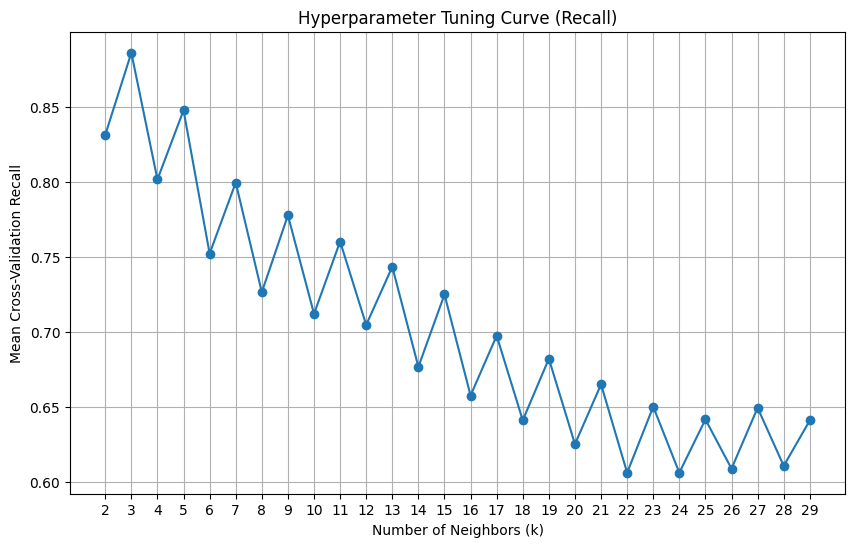

In [92]:
recalls = knn_cv.cv_results_['mean_test_score']  # Access mean test scores (recall)
params = knn_cv.cv_results_['param_n_neighbors'].data.astype(int)

plt.figure(figsize=(10, 6))
plt.plot(params, recalls, marker='o', linestyle='-')
plt.title('Hyperparameter Tuning Curve (Recall)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Recall')
plt.xticks(np.arange(2, 30, step=1))  # Adjust the range of x-axis ticks as needed
plt.grid(True)
plt.show()